# Pothole Classification

In this notebook we will try to analyze the data inorder to draw various insights from the data,which will help us in bringing a machine learning solution that will classify  whether the pothole is present or not.

<h4> Data overview </h4>

In [1]:
#Importing various libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_sensor = pd.read_csv('data/sensors.csv')
df_pothole = pd.read_csv('data/potholes.csv')

In [3]:
df_sensor.head(5)

,timestamp,latitude,longitude,speed,accelerometerX,accelerometerY,accelerometerZ,gyroX,gyroY,gyroZ
0,1.493004e+09,40.447526,-79.944193,0.0,0.217667,-0.980042,0.158340,0.032960,0.048734,0.107899
1,1.493004e+09,40.447526,-79.944193,0.0,0.011353,-0.946930,0.212097,0.023599,-0.087376,0.017527
2,1.493004e+09,40.447526,-79.944193,0.0,0.023651,-0.956955,0.208115,-0.009587,0.005381,0.003087
3,1.493004e+09,40.447526,-79.944193,0.0,0.061081,-0.956085,0.201462,-0.014854,0.001160,-0.003354
4,1.493004e+09,40.447526,-79.944193,0.0,0.070160,-0.956467,0.194504,-0.012799,-0.000980,0.000938


In [4]:
def isPothole(start,end,df_pothole):
    timestamp = df_pothole['timestamp']
    for time in timestamp:
        if start < time and time <= end:
            return True
    return False
    

    

In [5]:
def convert_to_interval(df_sensor,df_pothole):
    len_sensor = len(df_sensor)
    data = list()
    for k in range(0,len_sensor,10):
        current_interval = df_sensor[k:k+10]
        meanSpeed = current_interval['speed'].mean()
        sdSpeed = current_interval['speed'].std()
        maxAccelX = max(current_interval['accelerometerX'])
        maxAccelY = max(current_interval['accelerometerY'])
        maxAccelZ = max(current_interval['accelerometerZ'])
        maxGyroX = max(current_interval['gyroX'])
        maxGyroY = max(current_interval['gyroY'])
        maxGyroZ = max(current_interval['gyroZ'])
        minAccelX = min(current_interval['accelerometerX'])
        minAccelY = min(current_interval['accelerometerY'])
        minAccelZ = min(current_interval['accelerometerZ'])
        minGyroX = min(current_interval['gyroX'])
        minGyroY = min(current_interval['gyroY'])
        minGyroZ = min(current_interval['gyroZ'])
        meanAccelX = current_interval['accelerometerX'].mean()
        meanAccelY = current_interval['accelerometerY'].mean()
        meanAccelZ = current_interval['accelerometerZ'].mean()
        sdAccelX = current_interval['accelerometerX'].std()
        sdAccelY = current_interval['accelerometerY'].std()
        sdAccelZ = current_interval['accelerometerZ'].std()
        meanGyroX = current_interval['gyroX'].mean()
        meanGyroY = current_interval['gyroY'].mean()
        meanGyroZ = current_interval['gyroZ'].mean()
        sdGyroX = current_interval['gyroX'].std()
        sdGyroY = current_interval['gyroY'].std()
        sdGyroZ = current_interval['gyroZ'].std()
        pothole = isPothole(list(current_interval['timestamp'])[0],list(current_interval['timestamp'])[-1],df_pothole)
        datapoint = [meanSpeed, sdSpeed, maxAccelX, maxAccelY, maxAccelZ, maxGyroX, maxGyroY, 
                           maxGyroZ, minAccelX, minAccelY, minAccelZ, minGyroX, minGyroY, minGyroZ, 
                           meanAccelX, meanAccelY, meanAccelZ, meanGyroX, meanGyroY, meanGyroZ,
                           sdAccelX, sdAccelY, sdAccelZ, sdGyroX, sdGyroY, sdGyroZ, pothole]
        data.append(datapoint)
    df = pd.DataFrame.from_records(data)
    df.columns = ["meanSpeed", "sdSpeed", "maxAccelX", "maxAccelY", "maxAccelZ", "maxGyroX", "maxGyroY", 
                           "maxGyroZ", "minAccelX", "minAccelY", "minAccelZ", "minGyroX", "minGyroY", "minGyroZ", 
                           "meanAccelX", "meanAccelY", "meanAccelZ", "meanGyroX", "meanGyroY", "meanGyroZ",
                           "sdAccelX", "sdAccelY", "sdAccelZ", "sdGyroX", "sdGyroY", "sdGyroZ", "pothole"]
    
    return df
    


    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [6]:
df = pd.DataFrame(columns=["meanSpeed", "sdSpeed", "maxAccelX", "maxAccelY", "maxAccelZ", "maxGyroX", "maxGyroY", 
                           "maxGyroZ", "minAccelX", "minAccelY", "minAccelZ", "minGyroX", "minGyroY", "minGyroZ", 
                           "meanAccelX", "meanAccelY", "meanAccelZ", "meanGyroX", "meanGyroY", "meanGyroZ",
                           "sdAccelX", "sdAccelY", "sdAccelZ", "sdGyroX", "sdGyroY", "sdGyroZ", "pothole"])
for i in range(1,6):
  
    df_sensor = pd.read_csv('Pothole_Data/'+"trip%s_sensors.csv" % i)
    df_pothole = pd.read_csv('Pothole_Data/'+"trip%s_potholes.csv" % i)
    trip_df = convert_to_interval(df_sensor,df_pothole)
    
    #print(trip_df.head(5))
    
    df = df.append(trip_df,ignore_index=True)
    
    
df.head(5)

    
    
    

,meanSpeed,sdSpeed,maxAccelX,maxAccelY,maxAccelZ,maxGyroX,maxGyroY,maxGyroZ,minAccelX,minAccelY,...,meanGyroX,meanGyroY,meanGyroZ,sdAccelX,sdAccelY,sdAccelZ,sdGyroX,sdGyroY,sdGyroZ,pothole
0,0.041,0.129653,0.053787,-0.936584,0.295486,-0.007371,0.019259,0.007240,0.016998,-0.963852,...,-0.020783,-0.001779,0.000218,0.011710,0.009103,0.040247,0.010819,0.008888,0.003437,False
1,1.364,1.024057,0.120621,-0.875656,0.398834,0.022393,0.006554,0.033050,0.026840,-0.943787,...,-0.022780,-0.018999,-0.003276,0.031252,0.022495,0.028734,0.020178,0.019851,0.014961,False
2,4.436,1.351158,0.120605,-0.906296,0.404266,-0.010554,0.051599,0.018975,0.033325,-0.988800,...,-0.032363,-0.011066,-0.006807,0.024182,0.022507,0.057296,0.022679,0.024039,0.016592,False
3,7.060,0.575326,0.115387,-0.893860,0.379074,0.067697,-0.015656,0.061929,-0.036392,-0.986603,...,-0.038749,-0.074418,0.020480,0.047576,0.036484,0.068351,0.095503,0.052869,0.028209,False
4,9.149,0.864902,0.127914,-0.914444,0.357315,0.031195,0.094832,0.056660,0.008118,-1.018906,...,-0.006386,-0.015274,0.014688,0.038033,0.032032,0.052048,0.022819,0.048195,0.032339,False


<h5> Saving the dataframe </h5>

In [7]:
df.to_csv("combined.csv")

In [8]:
df = pd.read_csv("combined.csv")


In [9]:
df.shape

(987, 28)

# Classification

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [11]:
y = df['pothole'].astype(int)
X = df[['maxAccelX', 'maxAccelY', 'maxAccelZ', 'maxGyroX', 
                'maxGyroY', 'maxGyroZ', 'minAccelX', 'minAccelY', 'minAccelZ', 'minGyroX', 
                'minGyroY', 'minGyroZ', 'meanAccelX', 'meanAccelY', 'meanAccelZ', 
                'meanGyroX', 'meanGyroY', 'meanGyroZ', 'sdAccelX', 'sdAccelY', 'sdAccelZ', 
                'sdGyroX', 'sdGyroY', 'sdGyroZ']]

<h7> Support Vector Machine </h7>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Text(0, 0.5, 'Misclassification Rate')

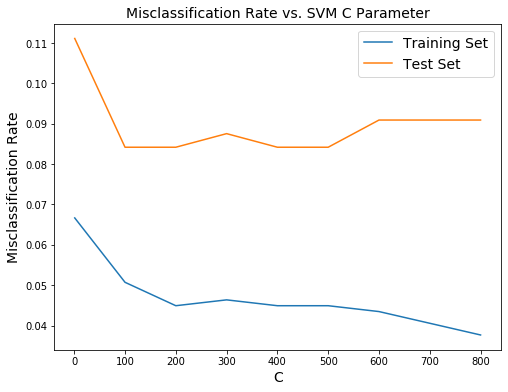

In [13]:
Cs = [1, 100, 200, 300, 400, 500, 600, 700, 800]
cvAccuracy = []
trainMisclassRate = []
testMisclassRate = []

for c in Cs:
    clf = SVC(C=c)
    scores = cross_val_score(clf, X,y, cv=5)
    cvAccuracy.append(np.mean(scores))
    clf.fit(X_train,y_train)
    y_fitted = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    trainMisclassRate.append(np.mean(y_fitted!=y_train))
    testMisclassRate.append(np.mean(y_pred!=y_test))

plt.figure(figsize=(8,6))
plt.plot(Cs, trainMisclassRate, label="Training Set")
plt.plot(Cs, testMisclassRate, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('Misclassification Rate vs. SVM C Parameter', fontsize=14)
plt.xlabel('C', fontsize=14)
plt.ylabel('Misclassification Rate', fontsize=14)

In [14]:
# Final SVM Classifier
clf = SVC(C=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Test Accuracy:", accuracy)
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

Final Test Accuracy: 0.9158249158249159

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       264
           1       0.75      0.36      0.49        33

    accuracy                           0.92       297
   macro avg       0.84      0.67      0.72       297
weighted avg       0.91      0.92      0.90       297


Confusion matrix:


array([[260,   4],
       [ 21,  12]])

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
def conf_matrix(y_test,predicted_y):
    labels = [0,1]
    A = confusion_matrix(y_test,predicted_y)
    B = (((A.T)/(A.sum(axis=1))).T)
    C =(A/A.sum(axis=0))
    print ("#"*25,"Confusion_Matrix","#"*25)
    plt.figure(figsize=(5,5))
    sns.heatmap(A,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    print ("#"*25,"Precision","#"*25)
    plt.figure(figsize=(5,5))
    sns.heatmap(B,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    print ("#"*25,"Recall","#"*25)
    plt.figure(figsize=(5,5))
    sns.heatmap(C,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()

######################### Confusion_Matrix #########################


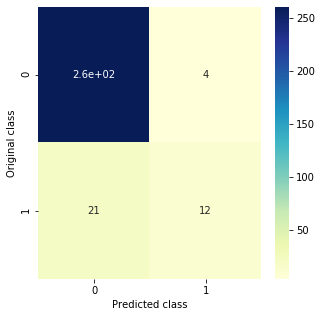

######################### Precision #########################


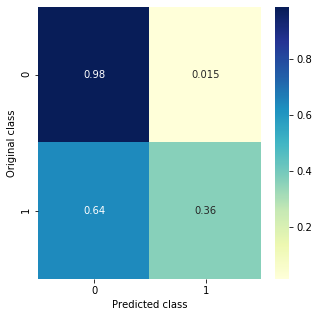

######################### Recall #########################


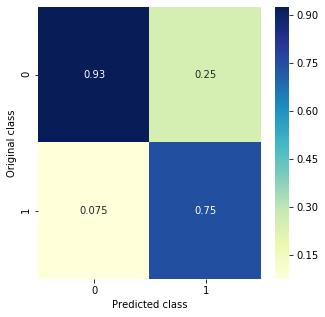

In [17]:
conf_matrix(y_test,y_pred)

In [18]:
from sklearn.linear_model import LogisticRegression

Text(0, 0.5, 'Misclassification Rate')

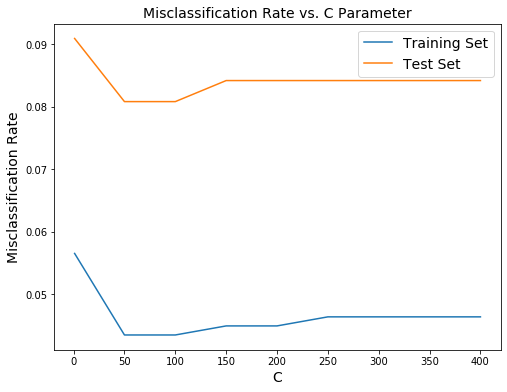

In [19]:
Cs = [1, 50, 100, 150, 200, 250, 300, 350, 400]
cvAccuracy = []
trainMisclassRate = []
testMisclassRate = []

for c in Cs:
    clf = LogisticRegression(C=c)
    scores = cross_val_score(clf, X,y, cv=5)
    cvAccuracy.append(np.mean(scores))
    clf.fit(X_train,y_train)
    y_fitted = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    trainMisclassRate.append(np.mean(y_fitted!=y_train))
    testMisclassRate.append(np.mean(y_pred!=y_test))

plt.figure(figsize=(8,6))
plt.plot(Cs, trainMisclassRate, label="Training Set")
plt.plot(Cs, testMisclassRate, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('Misclassification Rate vs. C Parameter', fontsize=14)
plt.xlabel('C', fontsize=14)
plt.ylabel('Misclassification Rate', fontsize=14)

In [20]:
# Final Logistic Regression Classifier
clf = LogisticRegression(C=50)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Test Accuracy:", accuracy)
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

Final Test Accuracy: 0.9191919191919192

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       264
           1       0.74      0.42      0.54        33

    accuracy                           0.92       297
   macro avg       0.83      0.70      0.75       297
weighted avg       0.91      0.92      0.91       297


Confusion matrix:


array([[259,   5],
       [ 19,  14]])

######################### Confusion_Matrix #########################


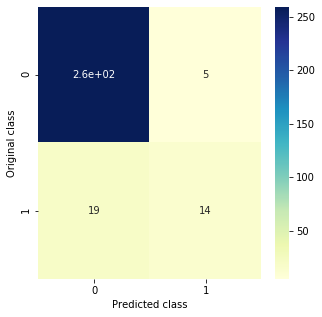

######################### Precision #########################


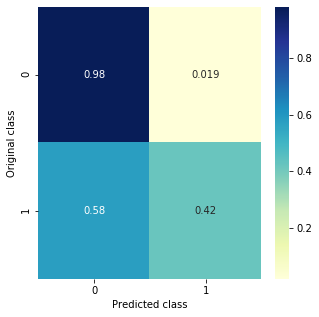

######################### Recall #########################


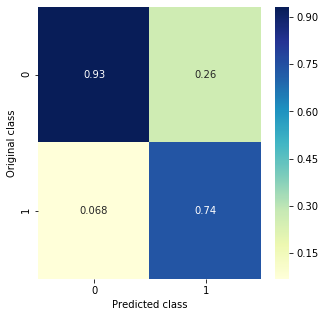

In [21]:
conf_matrix(y_test,y_pred)

Text(0, 0.5, 'Misclassification Rate')

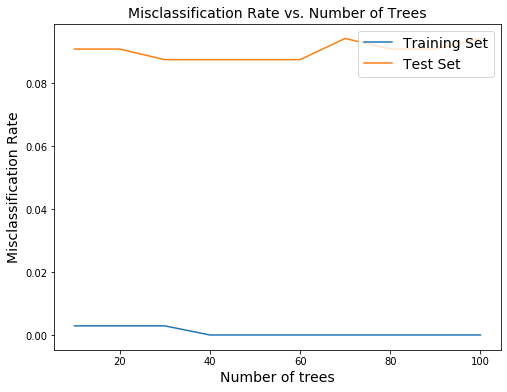

In [22]:
numTrees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
cvAccuracy = []
trainMisclassRate = []
testMisclassRate = []

for n in numTrees:
    clf = RandomForestClassifier(n_estimators=n, random_state=0)
    scores = cross_val_score(clf, X,y, cv=5)
    cvAccuracy.append(np.mean(scores))
    clf.fit(X_train,y_train)
    y_fitted = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    trainMisclassRate.append(np.mean(y_fitted!=y_train))
    testMisclassRate.append(np.mean(y_pred!=y_test))

plt.figure(figsize=(8,6))
plt.plot(numTrees, trainMisclassRate, label="Training Set")
plt.plot(numTrees, testMisclassRate, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('Misclassification Rate vs. Number of Trees', fontsize=14)
plt.xlabel('Number of trees', fontsize=14)
plt.ylabel('Misclassification Rate', fontsize=14)

In [23]:
# Final Random Forest Classifier
clf = RandomForestClassifier(n_estimators=50, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Test Accuracy:", accuracy)
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

Final Test Accuracy: 0.9124579124579124

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       264
           1       0.68      0.39      0.50        33

    accuracy                           0.91       297
   macro avg       0.81      0.69      0.73       297
weighted avg       0.90      0.91      0.90       297


Confusion matrix:


array([[258,   6],
       [ 20,  13]])

######################### Confusion_Matrix #########################


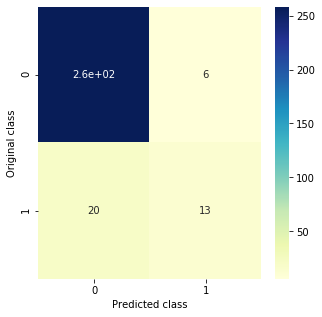

######################### Precision #########################


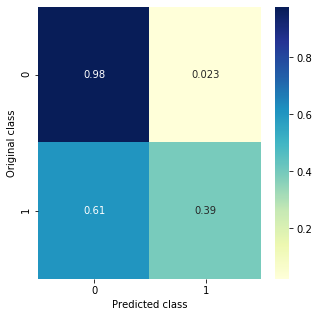

######################### Recall #########################


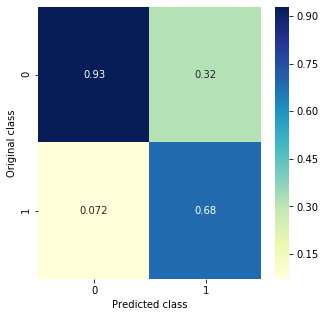

In [24]:
conf_matrix(y_test,y_pred)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Misclassification Rate')

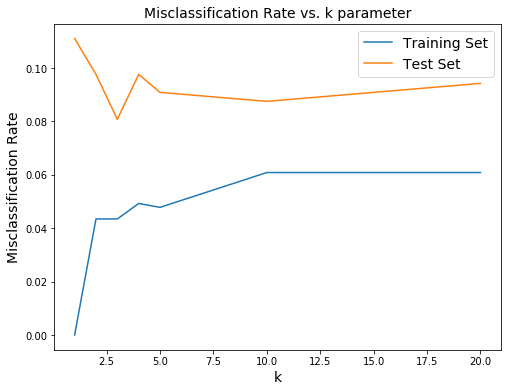

In [26]:
Ks = [1,2,3,4,5,10,20]
cvAccuracy = []
trainMisclassRate = []
testMisclassRate = []

for k in Ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X,y, cv=5)
    cvAccuracy.append(np.mean(scores))
    clf.fit(X_train,y_train)
    y_fitted = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    trainMisclassRate.append(np.mean(y_fitted!=y_train))
    testMisclassRate.append(np.mean(y_pred!=y_test))

plt.figure(figsize=(8,6))
plt.plot(Ks, trainMisclassRate, label="Training Set")
plt.plot(Ks, testMisclassRate, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('Misclassification Rate vs. k parameter', fontsize=14)
plt.xlabel('k', fontsize=14)
plt.ylabel('Misclassification Rate', fontsize=14)

In [27]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Test Accuracy:", accuracy)
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

Final Test Accuracy: 0.9023569023569024

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       264
           1       0.67      0.24      0.36        33

    accuracy                           0.90       297
   macro avg       0.79      0.61      0.65       297
weighted avg       0.88      0.90      0.88       297


Confusion matrix:


array([[260,   4],
       [ 25,   8]])

######################### Confusion_Matrix #########################


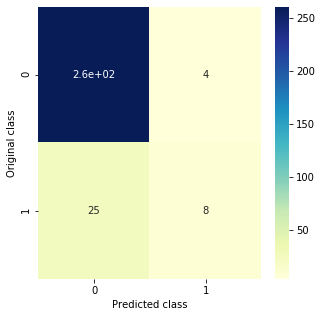

######################### Precision #########################


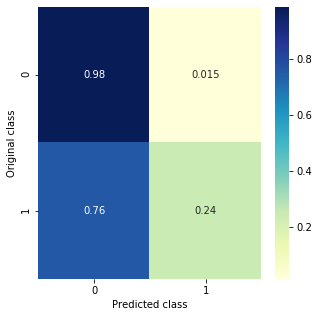

######################### Recall #########################


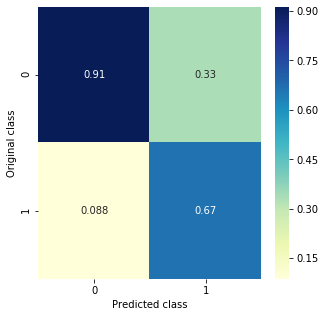

In [28]:
conf_matrix(y_test,y_pred)

In [29]:
#Saving our best model i.e; SVM

# Road Condition Classification 

In [59]:
def convert_to_interval_road(df_sensor,road):
    len_sensor = len(df_sensor)
    data = list()
    for k in range(0,len_sensor,25):
        current_interval = df_sensor[k:k+25]
        meanSpeed = current_interval['speed'].mean()
        sdSpeed = current_interval['speed'].std()
        maxAccelX = max(current_interval['accelerometerX'])
        maxAccelY = max(current_interval['accelerometerY'])
        maxAccelZ = max(current_interval['accelerometerZ'])
        maxGyroX = max(current_interval['gyroX'])
        maxGyroY = max(current_interval['gyroY'])
        maxGyroZ = max(current_interval['gyroZ'])
        minAccelX = min(current_interval['accelerometerX'])
        minAccelY = min(current_interval['accelerometerY'])
        minAccelZ = min(current_interval['accelerometerZ'])
        minGyroX = min(current_interval['gyroX'])
        minGyroY = min(current_interval['gyroY'])
        minGyroZ = min(current_interval['gyroZ'])
        meanAccelX = current_interval['accelerometerX'].mean()
        meanAccelY = current_interval['accelerometerY'].mean()
        meanAccelZ = current_interval['accelerometerZ'].mean()
        sdAccelX = current_interval['accelerometerX'].std()
        sdAccelY = current_interval['accelerometerY'].std()
        sdAccelZ = current_interval['accelerometerZ'].std()
        meanGyroX = current_interval['gyroX'].mean()
        meanGyroY = current_interval['gyroY'].mean()
        meanGyroZ = current_interval['gyroZ'].mean()
        sdGyroX = current_interval['gyroX'].std()
        sdGyroY = current_interval['gyroY'].std()
        sdGyroZ = current_interval['gyroZ'].std()
        if road == "g":
            condition = 0
        else:
            condition = 1
        
        datapoint = [meanSpeed, sdSpeed, maxAccelX, maxAccelY, maxAccelZ, maxGyroX, maxGyroY, 
                           maxGyroZ, minAccelX, minAccelY, minAccelZ, minGyroX, minGyroY, minGyroZ, 
                           meanAccelX, meanAccelY, meanAccelZ, meanGyroX, meanGyroY, meanGyroZ,
                           sdAccelX, sdAccelY, sdAccelZ, sdGyroX, sdGyroY, sdGyroZ, condition]
        data.append(datapoint)
    df = pd.DataFrame.from_records(data)
    df.columns = ["meanSpeed", "sdSpeed", "maxAccelX", "maxAccelY", "maxAccelZ", "maxGyroX", "maxGyroY", 
                           "maxGyroZ", "minAccelX", "minAccelY", "minAccelZ", "minGyroX", "minGyroY", "minGyroZ", 
                           "meanAccelX", "meanAccelY", "meanAccelZ", "meanGyroX", "meanGyroY", "meanGyroZ",
                           "sdAccelX", "sdAccelY", "sdAccelZ", "sdGyroX", "sdGyroY", "sdGyroZ", "condition"]
    
    return df
    


    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [60]:
df = pd.DataFrame(columns=["meanSpeed", "sdSpeed", "maxAccelX", "maxAccelY", "maxAccelZ", "maxGyroX", "maxGyroY", 
                           "maxGyroZ", "minAccelX", "minAccelY", "minAccelZ", "minGyroX", "minGyroY", "minGyroZ", 
                           "meanAccelX", "meanAccelY", "meanAccelZ", "meanGyroX", "meanGyroY", "meanGyroZ",
                           "sdAccelX", "sdAccelY", "sdAccelZ", "sdGyroX", "sdGyroY", "sdGyroZ", "condition"])
for i in range(1,11):
  
    df_sensor = pd.read_csv('road_qualityData/'+'good%s_sensors.csv' % i)
    
    trip_df = convert_to_interval_road(df_sensor,"g")
    
    #print(trip_df.head(5))
    
    df = df.append(trip_df,ignore_index=True)
    
    
for i in range(1,6):
  
    df_sensor = pd.read_csv('road_qualityData/'+'bad%s_sensors.csv' % i)
    
    trip_df = convert_to_interval_road(df_sensor,"b")
    
    #print(trip_df.head(5))
    
    df = df.append(trip_df,ignore_index=True)


df.head(5)
    

,meanSpeed,sdSpeed,maxAccelX,maxAccelY,maxAccelZ,maxGyroX,maxGyroY,maxGyroZ,minAccelX,minAccelY,...,meanGyroX,meanGyroY,meanGyroZ,sdAccelX,sdAccelY,sdAccelZ,sdGyroX,sdGyroY,sdGyroZ,condition
0,1.4480,1.873593,0.081833,-0.892563,0.531357,0.030879,0.022563,0.025532,-0.012863,-0.972656,...,-0.026106,-0.011531,-0.000536,0.024824,0.026782,0.092917,0.030684,0.022975,0.014998,0
1,8.5456,1.651202,0.382187,-0.828186,0.428528,0.076003,0.368514,0.048106,-0.030273,-1.048843,...,-0.021130,0.026896,-0.028604,0.082117,0.041041,0.052897,0.051127,0.098617,0.068498,0
2,12.4456,0.601582,0.161774,-0.785294,0.576187,0.074529,0.229708,0.159245,-0.280014,-1.212280,...,-0.028434,0.004568,0.000934,0.111291,0.096310,0.096204,0.075677,0.088893,0.074676,0
3,12.6376,0.139591,0.179916,-0.803604,0.311172,0.090103,0.124027,0.106324,-0.162643,-1.069412,...,-0.023337,-0.054731,0.031761,0.104010,0.075777,0.047894,0.068000,0.084106,0.048881,0
4,12.9352,0.283301,0.145187,-0.882919,0.280197,0.101957,0.148029,0.127700,-0.123413,-1.033752,...,-0.008532,-0.055637,0.026456,0.074642,0.039988,0.033150,0.055188,0.099061,0.063591,0


In [61]:
df.shape

(461, 27)

In [69]:
df.isnull().sum().sum()

14

In [70]:
df.isnull().values.any()

True

In [74]:
df = df.dropna()

In [75]:
df.shape

(459, 27)

In [76]:
df.isnull().values.any()

False

In [77]:
pd.value_counts(df["condition"])

0    373
1     86
Name: condition, dtype: int64

In [78]:
df.to_csv("roadQuality.csv",index = False)

In [79]:
roadQuality = pd.read_csv("roadQuality.csv")

In [80]:
roadQuality.head(5)

,meanSpeed,sdSpeed,maxAccelX,maxAccelY,maxAccelZ,maxGyroX,maxGyroY,maxGyroZ,minAccelX,minAccelY,...,meanGyroX,meanGyroY,meanGyroZ,sdAccelX,sdAccelY,sdAccelZ,sdGyroX,sdGyroY,sdGyroZ,condition
0,1.4480,1.873593,0.081833,-0.892563,0.531357,0.030879,0.022563,0.025532,-0.012863,-0.972656,...,-0.026106,-0.011531,-0.000536,0.024824,0.026782,0.092917,0.030684,0.022975,0.014998,0
1,8.5456,1.651202,0.382187,-0.828186,0.428528,0.076003,0.368514,0.048106,-0.030273,-1.048843,...,-0.021130,0.026896,-0.028604,0.082117,0.041041,0.052897,0.051127,0.098617,0.068498,0
2,12.4456,0.601582,0.161774,-0.785294,0.576187,0.074529,0.229708,0.159245,-0.280014,-1.212280,...,-0.028434,0.004568,0.000934,0.111291,0.096310,0.096204,0.075677,0.088893,0.074676,0
3,12.6376,0.139591,0.179916,-0.803604,0.311172,0.090103,0.124027,0.106324,-0.162643,-1.069412,...,-0.023337,-0.054731,0.031761,0.104010,0.075777,0.047894,0.068000,0.084106,0.048881,0
4,12.9352,0.283301,0.145187,-0.882919,0.280197,0.101957,0.148029,0.127700,-0.123413,-1.033752,...,-0.008532,-0.055637,0.026456,0.074642,0.039988,0.033150,0.055188,0.099061,0.063591,0


In [81]:
X = roadQuality[['meanSpeed', 'sdSpeed', 'maxAccelX', 'maxAccelY', 'maxAccelZ', 'maxGyroX', 
       'maxGyroY', 'maxGyroZ', 'minAccelX', 'minAccelY', 'minAccelZ', 'minGyroX', 
       'minGyroY', 'minGyroZ', 'meanAccelX', 'meanAccelY', 'meanAccelZ', 
       'meanGyroX', 'meanGyroY', 'meanGyroZ', 'sdAccelX', 'sdAccelY', 'sdAccelZ', 
       'sdGyroX', 'sdGyroY', 'sdGyroZ']]
y = roadQuality[["condition"]]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [83]:
pd.value_counts(y_train["condition"])

0    249
1     58
Name: condition, dtype: int64

In [84]:
pd.value_counts(y_test["condition"])

0    124
1     28
Name: condition, dtype: int64

Final SVM Test Accuracy:  0.9210526315789473


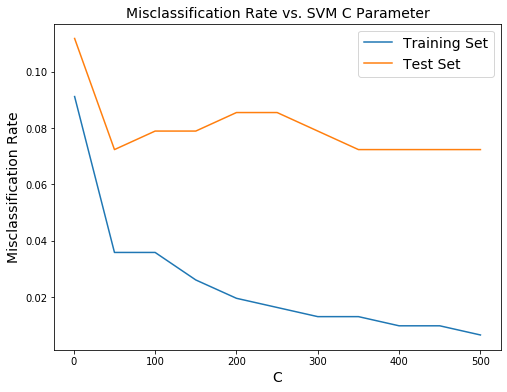

In [96]:
Cs = [1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
cvAccuracy = []
trainMisclassRate = []
testMisclassRate = []

for c in Cs:
    clf = SVC(C=c)
    scores = cross_val_score(clf, X,y, cv=5)
    cvAccuracy.append(np.mean(scores))
    clf.fit(X_train,y_train)
    y_fitted = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    trainMisclassRate.append(np.mean(y_fitted!=np.array(y_train["condition"])))
    testMisclassRate.append(np.mean(y_pred!=np.array(y_test["condition"])))

plt.figure(figsize=(8,6))
plt.plot(Cs, trainMisclassRate, label="Training Set")
plt.plot(Cs, testMisclassRate, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('Misclassification Rate vs. SVM C Parameter', fontsize=14)
plt.xlabel('C', fontsize=14)
plt.ylabel('Misclassification Rate', fontsize=14)

# Final SVM Classifier
clf = SVC(C=150)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==np.array(y_test["condition"]))
print ("Final SVM Test Accuracy: ", accuracy)

In [97]:
confusion_matrix(y_test, y_pred)

array([[120,   4],
       [  8,  20]])

In [98]:
a = classification_report(y_test, y_pred)
print (a)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       124
           1       0.83      0.71      0.77        28

    accuracy                           0.92       152
   macro avg       0.89      0.84      0.86       152
weighted avg       0.92      0.92      0.92       152



Final Logistic Test Accuracy:  0.9407894736842105


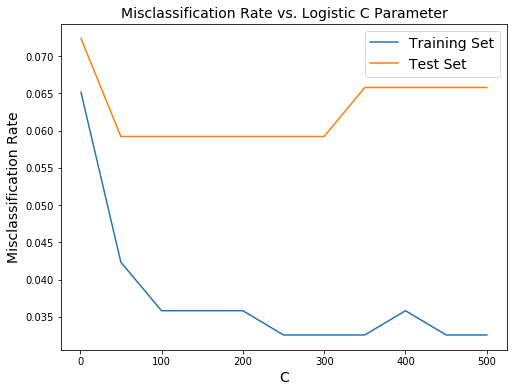

In [99]:
#logistic regression
Cs = [1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
cvAccuracy = []
trainMisclassRate = []
testMisclassRate = []
for c in Cs:
    clf = LogisticRegression(C=c)
    scores = cross_val_score(clf, X,y, cv=5)
    cvAccuracy.append(np.mean(scores))
    clf.fit(X_train,y_train)
    y_fitted = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    trainMisclassRate.append(np.mean(y_fitted!=np.array(y_train["condition"])))
    testMisclassRate.append(np.mean(y_pred!=np.array(y_test["condition"])))

plt.figure(figsize=(8,6))
plt.plot(Cs, trainMisclassRate, label="Training Set")
plt.plot(Cs, testMisclassRate, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('Misclassification Rate vs. Logistic C Parameter', fontsize=14)
plt.xlabel('C', fontsize=14)
plt.ylabel('Misclassification Rate', fontsize=14)

# Final Logistic Classifier
clf = LogisticRegression(C=250)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==np.array(y_test["condition"]))
print ("Final Logistic Test Accuracy: ", accuracy)

In [100]:
confusion_matrix(y_test, y_pred)

array([[121,   3],
       [  6,  22]])

In [101]:
a = classification_report(y_test, y_pred)
print (a)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       124
           1       0.88      0.79      0.83        28

    accuracy                           0.94       152
   macro avg       0.92      0.88      0.90       152
weighted avg       0.94      0.94      0.94       152



Final Random Forest Test Accuracy:  0.9078947368421053


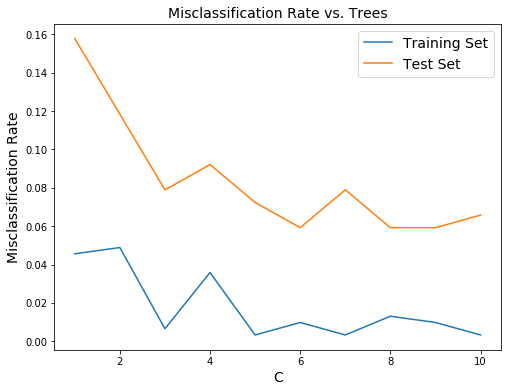

In [102]:
Cs = [1,2,3,4,5,6,7,8,9,10]
cvAccuracy = []
trainMisclassRate = []
testMisclassRate = []



for c in Cs:
    clf = RandomForestClassifier(n_estimators=c)
    scores = cross_val_score(clf, X,y, cv=5)
    cvAccuracy.append(np.mean(scores))
    clf.fit(X_train,y_train)
    y_fitted = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    trainMisclassRate.append(np.mean(y_fitted!=np.array(y_train["condition"])))
    testMisclassRate.append(np.mean(y_pred!=np.array(y_test["condition"])))


plt.figure(figsize=(8,6))
plt.plot(Cs, trainMisclassRate, label="Training Set")
plt.plot(Cs, testMisclassRate, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('Misclassification Rate vs. Trees', fontsize=14)
plt.xlabel('C', fontsize=14)
plt.ylabel('Misclassification Rate', fontsize=14)

# Final Random Forest Classifier
clf = RandomForestClassifier(n_estimators=6)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==np.array(y_test["condition"]))
print ("Final Random Forest Test Accuracy: ", accuracy)

In [103]:
confusion_matrix(y_test, y_pred)

array([[119,   5],
       [  9,  19]])

In [104]:
a = classification_report(y_test, y_pred)
print (a)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       124
           1       0.79      0.68      0.73        28

    accuracy                           0.91       152
   macro avg       0.86      0.82      0.84       152
weighted avg       0.90      0.91      0.91       152



######################### Confusion_Matrix #########################


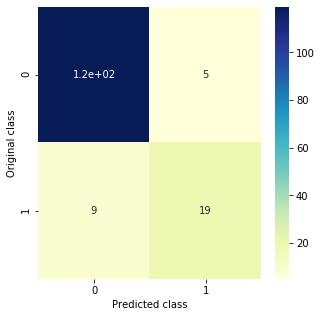

######################### Precision #########################


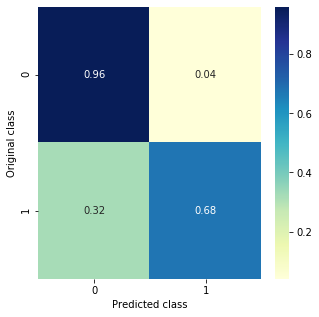

######################### Recall #########################


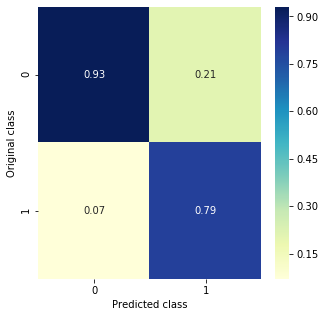

In [105]:
conf_matrix(y_test,y_pred)